### Exploring Data

In [2]:
import pandas as pd
data = pd.read_csv("datasetv.csv")
data.head()

,date,value
0,27/06/2005,1190.689941
1,28/06/2005,1201.569946
2,29/06/2005,1199.849976
3,30/06/2005,1191.329956
4,1/07/2005,1194.439941


In [3]:
data.shape

(2606, 2)

In [14]:
print(data.tail(10))
data = data.copy()
next_day = data["value"].iloc[1:]
data = data.iloc[:-1,:]
data["next_day"] = next_day.values

            date        value     next_day
2595  16/10/2015  2033.109985  2033.660034
2596  19/10/2015  2033.660034  2030.770020
2597  20/10/2015  2030.770020  2018.939941
2598  21/10/2015  2018.939941  2052.510010
2599  22/10/2015  2052.510010  2075.149902
2600  23/10/2015  2075.149902  2071.179932
2601  26/10/2015  2071.179932  2065.889893
2602  27/10/2015  2065.889893  2090.350098
2603  28/10/2015  2090.350098  2089.409912
2604  29/10/2015  2089.409912  2079.360107


In [17]:
print(data.dtypes)

data["value"] = data["value"].astype(float)
data["next_day"] = data["next_day"].astype(float)

date         object
value       float64
next_day    float64
dtype: object


### making predictions

In [19]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

predictors = data[["value"]]
to_predict = data["next_day"]

regressor.fit(predictors, to_predict)

next_day_predictions = regressor.predict(predictors)
print("next day predictions:", next_day_predictions)

next day predictions: [1191.1249244  1202.00060215 1200.28131622 ... 2071.26472264 2065.97678762
 2090.42726419]


### error

In [20]:
mse = sum((to_predict - next_day_predictions)** 2)
print(mse)

mse = mse / len(next_day_predictions)

628419.0065578189


### overfitting

In [21]:
import numpy as np
import random

np.random.seed(1)
random.seed(1)

data = data.loc[np.random.permutation(data.index)]

highest_train_row = int(data.shape[0] * .7)
train = data.loc[:highest_train_row,:]

test = data.loc[highest_train_row:,:]

regressor = LinearRegression()
regressor.fit(train[["value"]], train["next_day"])
predictions = regressor.predict(test[["value"]])

mse = sum((predictions - test["next_day"])**2) / len(predictions)
print(mse)



256.0168479847017


### visualizing

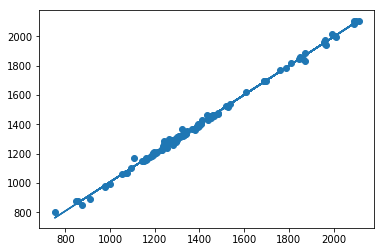

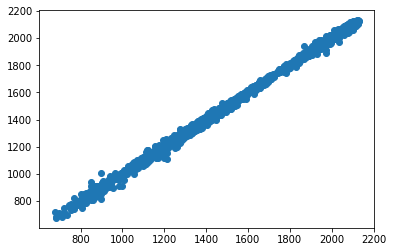

In [23]:
import matplotlib.pyplot as plt

plt.scatter(train["value"], train["next_day"])
plt.plot(train["value"], regressor.predict(train[["value"]]))
plt.show()

plt.scatter(test["value"], test["next_day"])
plt.plot(test["value"], predictions)
plt.show()

In [27]:
import math

rmse = math.sqrt(sum((predictions - test["next_day"]) ** 2) / len(predictions))
print("rmse val: ",rmse)

mae = sum(abs(predictions - test["next_day"])) / len(predictions)
print("mae val: ",mae)

rmse val:  16.00052649085966
mae val:  11.109866827683486
